# Лучин Михаил


#Лабораторная работа №2. Нормы векторов и матриц, решение переопределенной системы линейных уравнений, решение системы линейных уравнений с помощью LU разложения.
№5

In [2]:
import sympy as sm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

#1. Создать квадратную матрицу из случайных целых чисел из [0,8] размера 6. Создать две новые матрицы: первая – из двух последних строк исходной матрицы (должна получиться матрица размера 2х6), вторая – из двух первых столбцов матрицы (матрица размера 6х2).

In [3]:
# Создаем квадратную матрицу 6x6 из случайных целых чисел [0,8]
A = np.random.randint(0, 9, (6, 6))
print("Исходная матрица:\n", A)

# Создаем матрицу из двух последних строк
A_last_rows = A[-2:, :]
print("\nМатрица из двух последних строк:\n", A_last_rows)

# Создаем матрицу из двух первых столбцов
A_first_cols = A[:, :2]
print("\nМатрица из двух первых столбцов:\n", A_first_cols)

Исходная матрица:
 [[6 2 1 0 4 7]
 [1 5 2 8 5 8]
 [4 1 1 0 0 3]
 [4 8 3 2 4 7]
 [6 2 5 7 3 2]
 [5 2 7 4 0 3]]

Матрица из двух последних строк:
 [[6 2 5 7 3 2]
 [5 2 7 4 0 3]]

Матрица из двух первых столбцов:
 [[6 2]
 [1 5]
 [4 1]
 [4 8]
 [6 2]
 [5 2]]


#2. Создать вектор-строку 1x10 из случайных целых чисел. Вычислить норму $\|x\|_3$ самостоятельно написанной функцией и проверить результат с помощью linalg.norm() в Python.

In [4]:
x = np.random.randint(0, 10, 10)
print("\nВектор:\n", x)

def custom_norm_p(vector, p):
    return np.sum(np.abs(vector) ** p) ** (1/p)

norm_p3 = custom_norm_p(x, 3)
print("\nНорма ||x||_3 (собственная):", norm_p3)
norm_p3_lib = np.linalg.norm(x, ord=3)
print("Норма ||x||_3 (библиотечная):", norm_p3_lib)


Вектор:
 [8 3 3 7 3 0 4 0 3 9]

Норма ||x||_3 (собственная): 12.064467852593173
Норма ||x||_3 (библиотечная): 12.064467852593173


#3. Создать матрицу из случайных целых чисел. Найти норму матрицы Фробениуса с помощью самостоятельно написанного алгоритма, проверить результат с помощью linalg.norm() в Python

In [5]:
# Создаем случайную матрицу
A = np.random.randint(0, 10, (4, 4))
print("\nМатрица A:\n", A)

# Функция для вычисления нормы Фробениуса
def custom_frobenius(matrix):
    return np.sqrt(np.sum(matrix ** 2))

norm_frob = custom_frobenius(A)
print("\nНорма Фробениуса (собственная):", norm_frob)

# Проверка с помощью библиотечной функции
norm_frob_lib = np.linalg.norm(A, 'fro')
print("Норма Фробениуса (библиотечная):", norm_frob_lib)


Матрица A:
 [[8 1 9 0]
 [2 5 2 0]
 [0 0 9 5]
 [5 6 6 2]]

Норма Фробениуса (собственная): 19.6468827043885
Норма Фробениуса (библиотечная): 19.6468827043885


#4. Найти псевдорешение системы \begin{cases}
15.7x_1 + 6.6x_2 - 5.7x_3 = -2.4 \\
8.8x_1 - 6.7x_2 + 5.5x_3 = 5.6 \\
6.3x_1 - 5.7x_2 - 23.4x_3 = 7.7 \\
14.3x_1 + 8.7x_2 - 15.7x_3 = 23.4
\end{cases}


In [6]:
A = np.array([
    [15.7, 6.6, -5.7],
    [8.8, -6.7, 5.5],
    [6.3, -5.7, -23.4],
    [14.3, 8.7, -15.7]
])
B = np.array([-2.4, 5.6, 7.7, 23.4])

# Находим псевдорешение
X_pseudo = np.linalg.inv(A.T @ A) @ A.T @ B
print("\nПсевдорешение системы (собственное):\n", X_pseudo)

# Проверка с помощью библиотечной функции
X_pseudo_lib = np.linalg.pinv(A) @ B
print("Псевдорешение системы (библиотечное):\n", X_pseudo_lib)


Псевдорешение системы (собственное):
 [ 0.37906884  0.12889361 -0.39275031]
Псевдорешение системы (библиотечное):
 [ 0.37906884  0.12889361 -0.39275031]


#5. Даны пять точек (20; 19), (25; 16), (30; 27), (35, 24), (40, 31). Найти уравнение наиболее выгодной траектории. Построить график.


Уравнение траектории: y = 0.64x + 4.20


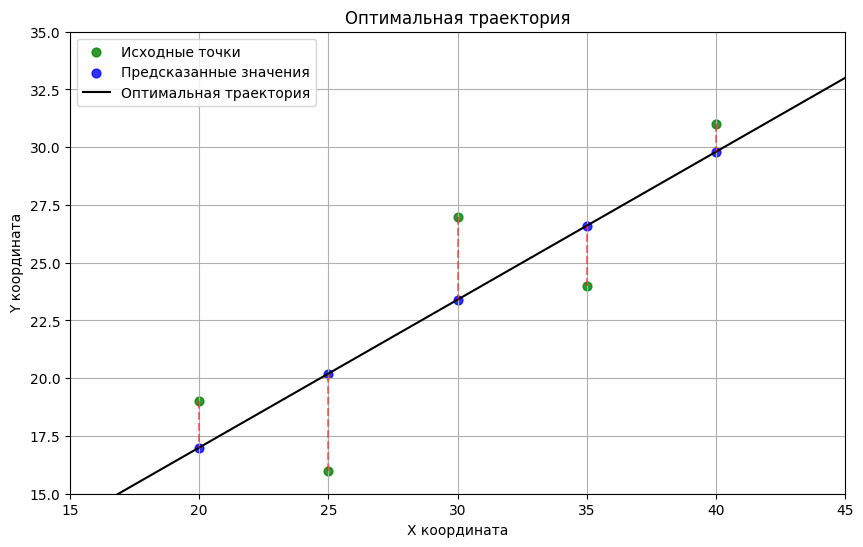

In [7]:
points = np.array([[20, 19], [25, 16], [30, 27], [35, 24], [40, 31]])
x_points = points[:, 0]
y_points = points[:, 1]

# Вычисляем коэффициенты регрессии
A = np.vstack([x_points, np.ones(len(x_points))]).T
coefficients = np.linalg.inv(A.T @ A) @ A.T @ y_points
a, b = coefficients
print("\nУравнение траектории: y = {:.2f}x + {:.2f}".format(a, b))

# Вычисляем предсказанные значения
y_pred = a * x_points + b

# Настройка графика
plt.figure(figsize=(10, 6))
plt.xlim(15, 45)
plt.ylim(15, 35)

# Рисуем исходные точки и предсказанные значения (исправленный синтаксис)
plt.scatter(x_points, y_points, s=40, c='g', marker='o', alpha=0.8, label='Исходные точки')
plt.scatter(x_points, y_pred, s=40, c='b', marker='o', alpha=0.8, label='Предсказанные значения')

# Линия регрессии
X_support = np.linspace(15, 45, 100)
Y_model = a * X_support + b
plt.plot(X_support, Y_model, 'k-', label='Оптимальная траектория')

# Вертикальные линии (ошибки)
for i in range(len(x_points)):
    X_v = (x_points[i], x_points[i])
    Y_v = (y_points[i], y_pred[i])
    plt.plot(X_v, Y_v, 'r', linestyle='dashed', alpha=0.5)

plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.title('Оптимальная траектория')
plt.legend()
plt.grid(True)
plt.show()

#6. Создать произвольную верхнетреугольную матрицу А 4 порядка (не унитреугольную), вектор B произвольный. Решить систему AX = B.

In [8]:
# Создаем верхнетреугольную матрицу 4x4 с ненулевыми элементами на диагонали
while True:
    A = np.triu(np.random.randint(0, 10, (4, 4)))
    if np.all(np.diag(A) != 0):  # Проверяем, что диагональные элементы не нули
        break

B = np.random.randint(0, 10, 4)
print("\nВерхнетреугольная матрица:\n", A)
print("Вектор B:\n", B)

# Решение обратной подстановкой
n = len(B)
x = np.zeros(n)
for i in range(n-1, -1, -1):
    if A[i, i] == 0:
        if B[i] == 0:
            x[i] = np.nan  # Система имеет бесконечно много решений
        else:
            x[i] = np.inf  # Система несовместна
    else:
        x[i] = (B[i] - np.sum(A[i, i+1:] * x[i+1:])) / A[i, i]
print("\nРешение системы (собственное):", x)

# Проверка с помощью библиотечной функции
try:
    x_lib = np.linalg.solve(A, B)
    print("Решение системы (библиотечное):", x_lib)
except np.linalg.LinAlgError:
    print("Система не имеет единственного решения (матрица вырождена)")


Верхнетреугольная матрица:
 [[7 8 1 3]
 [0 4 2 9]
 [0 0 1 4]
 [0 0 0 5]]
Вектор B:
 [1 9 9 8]

Решение системы (собственное): [ 2.11428571 -2.65        2.6         1.6       ]
Решение системы (библиотечное): [ 2.11428571 -2.65        2.6         1.6       ]


#7. Решить систему, используя LU разложение матрицы. LU разложение должно быть найдено самостоятельно написанной функцией, полученные матрицы выведены на экран. Придерживаться плана решения, приведенного в пособии!


In [ ]:
# LU-разложение (упрощенная реализация)
def custom_lu(matrix):
    n = matrix.shape[0]
    L = np.eye(n)
    U = matrix.copy()
    for i in range(n-1):
        for j in range(i+1, n):
            L[j, i] = U[j, i] / U[i, i]
            U[j, i:] -= L[j, i] * U[i, i:]
    return L, U

A = np.array([
    [15.7, 6.6, -5.7, 11.5],
    [8.8, -6.7, 5.5, -4.5],
    [6.3, -5.7, -23.4, 6.6],
    [14.3, 8.7, -15.7, -5.8]
])
B = np.array([-2.4, 5.6, 7.7, 23.4])

L, U = custom_lu(A)
print("\nМатрица L:\n", L)
print("\nМатрица U:\n", U)

# Решение системы с LU-разложением
y = np.linalg.solve(L, B)
x = np.linalg.solve(U, y)
print("\nРешение системы с LU (собственное):", x)

# Проверка с помощью библиотечной функции
x_lib = np.linalg.solve(A, B)
print("Решение системы (библиотечное):", x_lib)


Матрица L:
 [[ 1.          0.          0.          0.        ]
 [ 0.56050955  1.          0.          0.        ]
 [ 0.40127389  0.80278067  1.          0.        ]
 [ 0.91082803 -0.25852882  0.29403922  1.        ]]

Матрица U:
 [[ 15.7          6.6         -5.7         11.5       ]
 [  0.         -10.39936306   8.69490446 -10.94585987]
 [  0.           0.         -28.09284008  10.77247504]
 [  0.           0.           0.         -22.2718727 ]]

Решение системы с LU (собственное): [ 0.46606121  0.11028446 -0.56570877 -1.188659  ]
Решение системы (библиотечное): [ 0.46606121  0.11028446 -0.56570877 -1.188659  ]
